## Analysis on the performance of the sales outlets that will help the owner and investor to take potential decision.

Shareable Link: Please visit:

https://drive.google.com/file/d/1fOFfJAm1PRsI9gi0R2rusH5NMQxeVli2/view?usp=sharing

**Task and Goal:**

Here, we are going to scrutinize and process the given dataset. The final goal is to assess the performance of the chain's sales outlets and to come up with favorable information and strategy that will help the owner and investor to take potential decision. So, initially, we aim at finding the internal connection between different columns or categories of the given dataset.

We will consider the following steps in our whole process and analysis:


-  <a href='#the_destination1'>General Information</a>


-  <a href='#the_destination2'>Data preprocessing, changing data types and preparing for analysis</a>


-  <a href='#the_destination3'>Study and Analysis of the Data</a>


-  <a href='#the_destination4'>Test the hypotheses</a>


-  <a href='#the_destination5'>Recommendation and Conclusion</a>  


-  <a href='#the_destination6'>List of sources and Path to the presentation's file</a>

<a id='the_destination1'></a>
###  Opening the data file and extracting the general information 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import plotly.express as px
import scipy.stats as stats

In [2]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [3]:
try:
    retail_data = pd.read_csv("datasets/retail_dataset_us.csv")
    product_data = pd.read_csv("datasets/product_codes_us.csv" , sep=";")
except:
    retail_data = pd.read_csv("/datasets/retail_dataset_us.csv")
    product_data = pd.read_csv("/datasets/product_codes_us.csv", sep=";")

In [4]:
print('Retail data:')
print()
retail_data.info()
display(retail_data.head())
print()
print()
print('Products codes:')
print()
product_data.info()
display(product_data.head())


Retail data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
loyalty_program    105335 non-null int64
ShopID             105335 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28




Products codes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
productID        3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


<a id='the_destination2'></a>
### Data preprocessing, changing data types and preparing for analysis

**Renaming columns**

In [5]:
# Renaming columns
retail_data.columns=['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id', 'loyalty_program', 'shop_id']
product_data.columns=['item_id', 'price_per_one']

**Checking missing values and duplicates**

In [6]:
# To check missing values
print(retail_data.isnull().sum())
print()
print(product_data.isnull().sum())

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
loyalty_program        0
shop_id                0
dtype: int64

item_id          0
price_per_one    0
dtype: int64


In [7]:
# To check the percentage of missing values for each column

mv_report = round((retail_data.isna().mean() * 100),2).to_frame()
mv_report = mv_report.rename(columns = {0: 'missing_values_%'})

display(mv_report.sort_values(by = 'missing_values_%', ascending = False))

,missing_values_%
customer_id,34.38
purchase_id,0.00
item_id,0.00
quantity,0.00
purchase_date,0.00
loyalty_program,0.00
shop_id,0.00


In [8]:
# To fill the missing values of 'customer_id' column with  0
retail_data['customer_id']=retail_data['customer_id'].fillna('unknown')

In [9]:
# To show duplicates for all columns of retail_data simultaneously
display(retail_data[retail_data[retail_data.columns.to_list()].duplicated() == True]) 

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
5345,537265,21499,24,2016-12-06 11:26:00,21598,0,Shop 7
5863,540803,21485,0,2017-01-11 12:30:00,20348,0,Shop 17
6893,540524,21326,11,2017-01-09 12:53:00,22414,1,Shop 6
7821,537192,22585,0,2016-12-05 13:42:00,22081,1,Shop 6
10806,537772,22080,4,2016-12-08 12:35:00,23722,1,Shop 27
...,...,...,...,...,...,...,...
105164,542224,22178,5,2017-01-26 12:45:00,23567,1,Shop 1
105173,544153,82552,1,2017-02-16 12:11:00,21035,0,Shop 25
105178,540839,21123,0,2017-01-11 15:42:00,22470,1,Shop 29
105229,543277,21533,0,2017-02-06 14:33:00,21487,0,Shop 0


In [10]:
# To show duplicates for all columns of product_data simultaneously
display(product_data[product_data[product_data.columns.to_list()].duplicated() == True]) 

,item_id,price_per_one


In [11]:
#To remove the duplicates
retail_data = retail_data.drop_duplicates()

**changing data type**

In [12]:
# changing data type of different columns

# To convert the data type of 'purchase_date' column of retail_data DataFrame into datetime format
retail_data['purchase_date'] = retail_data['purchase_date'].astype('datetime64[ns]')
# To convert the data type of 'loyalty_program' column of retail_data DataFrame into category type
retail_data['loyalty_program'] = retail_data['loyalty_program'].astype('category')
# To convert the data type of 'shop_id' column of retail_data DataFrame into category type
retail_data['shop_id'] = retail_data['shop_id'].astype('category')

In [13]:
# There are negative number in quantity column but quantity can not be negative. We can take consider the absolute value
# to solve the issue

retail_data['quantity'] = abs(retail_data['quantity'])
product_data['price_per_one'] = abs(product_data['price_per_one'])

In [14]:
# Add a new column to store date from retail_dt column of retail_data DataFrame and then convert its type

retail_data['date_of_purchase']= retail_data['purchase_date'].dt.date
retail_data['date_of_purchase'] = retail_data['date_of_purchase'].astype('datetime64[ns]') 

**Merging both data frames**

In [15]:
df = pd.merge(retail_data, product_data, how="left", on= 'item_id')
df['cost'] = df['quantity'] * df['price_per_one']
display(df)

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date_of_purchase,price_per_one,cost
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,0.42,4.62
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,1.65,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,0.72,5.04
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2.55,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,unknown,0,Shop 0,2016-12-13,1.25,1.25
104298,540247,21742,0,2017-01-05 15:56:00,21143,0,Shop 24,2017-01-05,5.95,0.00
104299,538068,85048,1,2016-12-09 14:05:00,23657,1,Shop 16,2016-12-09,6.95,6.95
104300,538207,22818,11,2016-12-10 11:33:00,18427,0,Shop 29,2016-12-10,0.42,4.62


<a id='the_destination3'></a>
### Study and Analysis of the Data

In [16]:
# number of unique customers
unique_customer_number = df['customer_id'].nunique()
print("The number of unique customers (who have customer id)  is ", unique_customer_number)

The number of unique customers (who have customer id)  is  1750


In [17]:
# How many of them are listed in loyalty program? 
loyal_customer_number = df.query(' loyalty_program == 1 ')['customer_id'].nunique()
print("The number of customer listed in loyalty program is ", loyal_customer_number)

The number of customer listed in loyalty program is  587


In [18]:
#How many purchases data are in the processed data?
# To find the number of sales/ how many times customer made receipt
print("The number of receipt made by customers (purchases) is ", df["purchase_id"].nunique())

The number of receipt made by customers (purchases) is  4894


In [19]:
# number of unique items
unique_item_number = df['item_id'].nunique()
print("The number of unique item  is ", unique_item_number)

The number of unique item  is  3159


In [20]:
#Adding new columns for year, month, and week in terms of 'date_of_purchase'
df['purchase_year'] = df['date_of_purchase'].dt.year
df['purchase_month'] = df['date_of_purchase'].dt.month
df['purchase_week'] = df['date_of_purchase'].dt.week

In [21]:
display(df.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date_of_purchase,price_per_one,cost,purchase_year,purchase_month,purchase_week
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,0.42,4.62,2016,12,49
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,1.65,0.00,2016,12,50
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,0.72,5.04,2016,12,50
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2.55,0.00,2017,2,6
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,0.00,0.00,2017,2,7


**Looking at the period of time that covers data; Finding the maximum and the minimum date;**

In [22]:
#What period of time does the data cover? Find the maximum and the minimum date.
#What period does the data actually represent? # draw histogram

print("The data starts from (minimum date):  ", df['date_of_purchase'].min())

print("The data ends on (maximum date):  ", df['date_of_purchase'].max())

The data starts from (minimum date):   2016-12-01 00:00:00
The data ends on (maximum date):   2017-02-28 00:00:00


In [23]:
print("The given data lies on ", df['date_of_purchase'].nunique() , "days out of 90 days(the given period).")

The given data lies on  68 days out of 90 days(the given period).


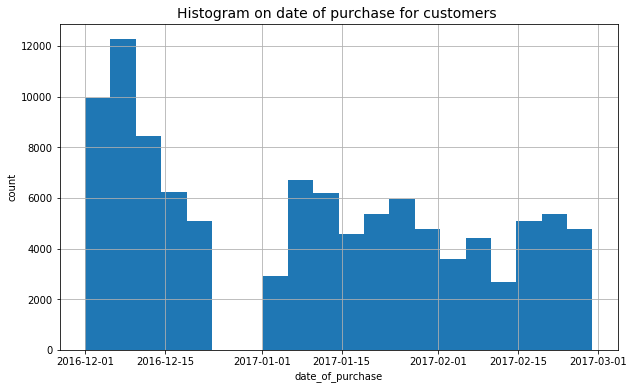

In [24]:
# Histogram for date_of_purchase
plt.figure(figsize=(10,6))
#fig, ax = plt.subplots()
df['date_of_purchase'].hist(bins=20)

#fig.autofmt_xdate()
#plt.title('Histogram on date_of_purchase for customers', size =14)
plt.title('Histogram on date of purchase for customers ', size =14)
plt.xlabel('date_of_purchase')
plt.ylabel('count')
plt.show()


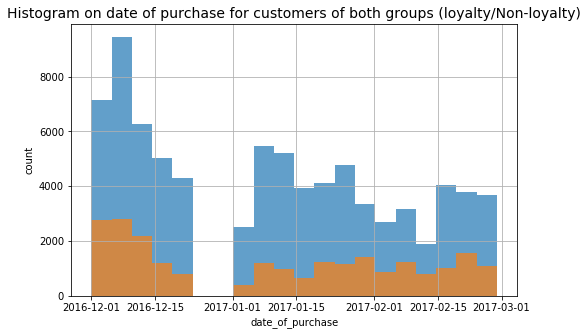

In [25]:
# Histogram for number of seats for streets with more than 10 restaurants
plt.figure(figsize=(8,5))
df.query(' loyalty_program == 0 ')['date_of_purchase'].hist(bins=20, alpha=0.7)
df.query(' loyalty_program == 1 ')['date_of_purchase'].hist(bins=20, alpha=0.7)

#plt.title('Histogram on date_of_purchase for customers (loyalty/Non-loyalty)', size =14)
plt.title('Histogram on date of purchase for customers of both groups (loyalty/Non-loyalty)', size =14)
plt.xlabel('date_of_purchase')
plt.ylabel('count')

plt.show()

In [26]:
print(df.query('date_of_purchase > "2016-12-22" and date_of_purchase < "2017-01-05"')['date_of_purchase'].value_counts())

2017-01-04    1175
2016-12-23     962
Name: date_of_purchase, dtype: int64


**Finding number of purchases and sales in each time period for overall and for each shop**


**Finding overall monthly sales and number of purchases in each month:**

In [27]:
# Finding number of purchase per month # Overall

purchase_per_month = df.groupby(['purchase_year', 'purchase_month']).agg(
    {'purchase_id': ['count', 'nunique'], 'cost': 'sum'}
)

purchase_per_month.columns = ['purchase_id_count', 'unique_purchase_id', 'total_monthly_sales']
purchase_per_month  = purchase_per_month.reset_index()

purchase_per_month['avg_items_per_purchaser'] = (purchase_per_month['purchase_id_count'] / purchase_per_month['unique_purchase_id'])
purchase_per_month['avg_cost_per_purchaser'] = (purchase_per_month['total_monthly_sales'] / purchase_per_month['unique_purchase_id'])

display(purchase_per_month) 

,purchase_year,purchase_month,purchase_id_count,unique_purchase_id,total_monthly_sales,avg_items_per_purchaser,avg_cost_per_purchaser
0,2016,12,41955,2025,384738.65,20.718519,189.994395
1,2017,1,34895,1476,500125.98,23.641599,338.838740
2,2017,2,27452,1393,307552.51,19.707107,220.784286


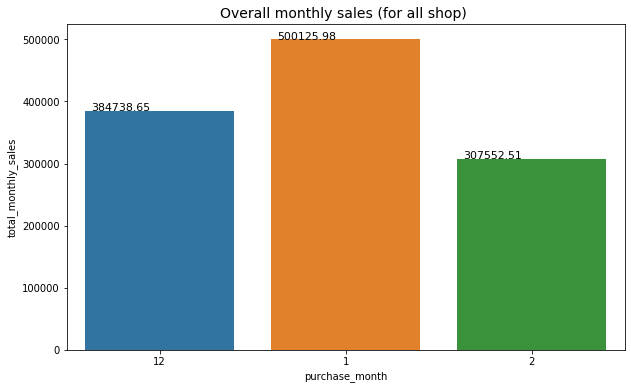

In [28]:
# To visualize Overall monthly sales (for all shop)
plt.figure(figsize=(10,6))
plt.title('Overall monthly sales (for all shop) ', fontsize=14)
d_order=[12,1,2]
ax=sns.barplot(data=purchase_per_month, x='purchase_month', y='total_monthly_sales', order=d_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


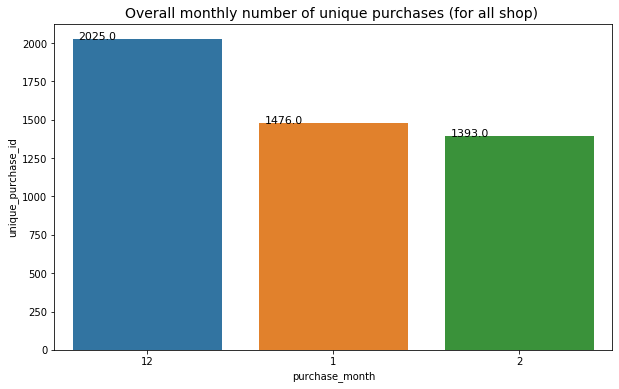

In [29]:
# To visualize Overall monthly unique_purchase_id (for all shop)
plt.figure(figsize=(10,6))
#plt.title('Overall monthly unique_purchase_id (for all shop) ', fontsize=14)
plt.title('Overall monthly number of unique purchases (for all shop) ', fontsize=14)
d_order=[12,1,2]
ax=sns.barplot(data=purchase_per_month, x='purchase_month', y='unique_purchase_id', order=d_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


**Finding overall weekly sales and number of purchases in each week**

In [30]:
# Finding number of purchase and sales per week # Overall

purchase_per_week = df.groupby(['purchase_year', 'purchase_week']).agg(
    {'purchase_id': ['count', 'nunique'], 'cost': 'sum'}
)
purchase_per_week.columns = ['purchase_id_count', 'unique_purchase_id', 'total_weekly_sales']
purchase_per_week  = purchase_per_week.reset_index()

purchase_per_week['avg_items_per_purchaser'] = (purchase_per_week['purchase_id_count'] / purchase_per_week['unique_purchase_id'])
purchase_per_week['avg_cost_per_purchaser'] = (purchase_per_week['total_weekly_sales'] / purchase_per_week['unique_purchase_id'])

display(purchase_per_week)

,purchase_year,purchase_week,purchase_id_count,unique_purchase_id,total_weekly_sales,avg_items_per_purchaser,avg_cost_per_purchaser
0,2016,48,7315,418,72211.81,17.500000,172.755526
1,2016,49,17601,761,153100.35,23.128778,201.183114
2,2016,50,11951,599,116236.99,19.951586,194.051736
3,2016,51,5088,247,43189.50,20.599190,174.856275
4,2017,1,6539,269,71215.95,24.308550,264.743309
5,2017,2,9261,365,108254.98,25.372603,296.588986
6,2017,3,9082,296,229919.91,30.682432,776.756453
7,2017,4,7804,436,73619.11,17.899083,168.851170
8,2017,5,7374,398,73185.01,18.527638,183.881935
9,2017,6,5354,314,63431.70,17.050955,202.011783


posx and posy should be finite values
posx and posy should be finite values


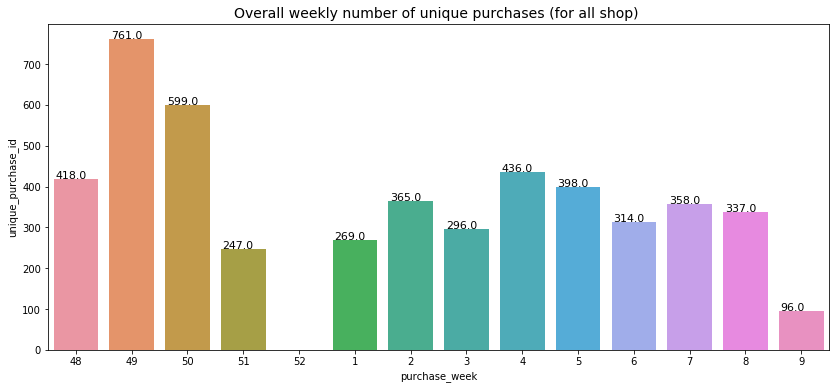

In [31]:
# To visualize Overall unique purchase (for all shop)
plt.figure(figsize=(14,6))
#plt.title('Overall weekly unique_purchase_id (for all shop) ', fontsize=14)
plt.title('Overall weekly number of unique purchases (for all shop) ', fontsize=14)
d_order=[48,49,50,51,52,1,2,3,4,5,6,7,8,9]
ax=sns.barplot(data=purchase_per_week, x='purchase_week', y='unique_purchase_id', order=d_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

# Because of using order parameter, there is "posx and posy should be finite values" 

posx and posy should be finite values
posx and posy should be finite values


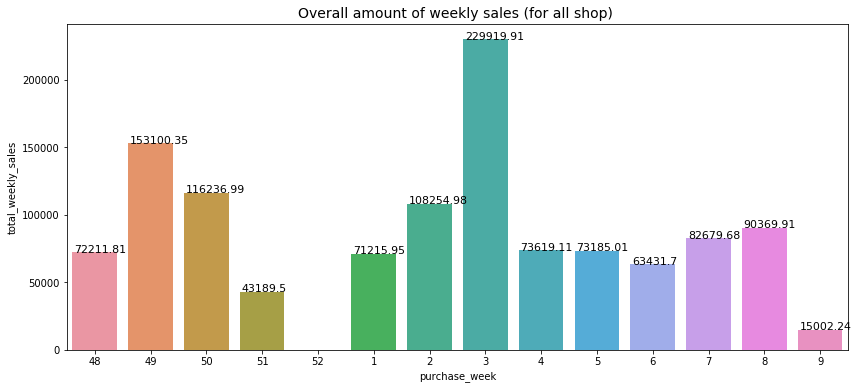

In [32]:
# To visualize Overall monthly sales (for all shop)
plt.figure(figsize=(14,6))
plt.title('Overall amount of weekly sales (for all shop) ', fontsize=14)
d_order=[48,49,50,51,52,1,2,3,4,5,6,7,8,9]
ax=sns.barplot(data=purchase_per_week, x='purchase_week', y='total_weekly_sales', order=d_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


**Finding overall daily sales and number of purchases in each day**

In [33]:
# Finding number of purchase and sales per day # Overall

purchase_per_day = df.groupby(['purchase_year', 'date_of_purchase']).agg(
    {'purchase_id': ['count', 'nunique'], 'cost': 'sum'}
)
purchase_per_day.columns = ['purchase_id_count', 'unique_purchase_id', 'total_daily_sales']
purchase_per_day  = purchase_per_day.reset_index()

purchase_per_day['avg_items_per_purchaser'] = (purchase_per_day['purchase_id_count'] / purchase_per_day['unique_purchase_id'])
purchase_per_day['avg_cost_per_purchaser'] = (purchase_per_day['total_daily_sales'] / purchase_per_day['unique_purchase_id'])

display(purchase_per_day)

,purchase_year,date_of_purchase,purchase_id_count,unique_purchase_id,total_daily_sales,avg_items_per_purchaser,avg_cost_per_purchaser
0,2016,2016-12-01,3063,143,27367.96,21.419580,191.384336
1,2016,2016-12-02,2068,167,29207.83,12.383234,174.897186
2,2016,2016-12-03,2184,108,15636.02,20.222222,144.777963
3,2016,2016-12-05,2619,95,15243.64,27.568421,160.459368
4,2016,2016-12-06,3830,133,21538.47,28.796992,161.943383
...,...,...,...,...,...,...,...
63,2017,2017-02-23,1576,68,13050.26,23.176471,191.915588
64,2017,2017-02-24,1289,66,12666.05,19.530303,191.909848
65,2017,2017-02-25,977,51,13959.26,19.156863,273.710980
66,2017,2017-02-27,786,35,5252.36,22.457143,150.067429


In [34]:
print("The average daily sales for all shops: $",round(purchase_per_day['total_daily_sales'].mean(),2) )

The average daily sales for all shops: $ 17535.55


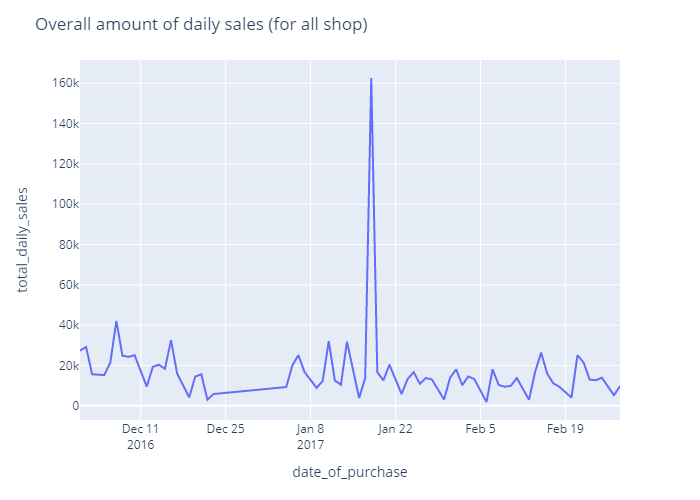

In [35]:
fig = px.line(purchase_per_day, x='date_of_purchase', y='total_daily_sales')
fig.update_layout(title_text='Overall amount of daily sales (for all shop)')
fig.show(renderer="png")

**Finding daily sales and number of purchases in each day w.r.t. each shop**

In [36]:
# Finding purchases per day # for each shop

purchase_per_shop_day = df.groupby(['date_of_purchase', 'shop_id']).agg(
    {'purchase_id': ['count', 'nunique'], 'cost': 'sum'}
)
purchase_per_shop_day.columns = ['purchase_id_count', 'unique_purchase_id', 'total_daily_sales']
purchase_per_shop_day = purchase_per_shop_day.reset_index()
purchase_per_shop_day['avg_items_per_purchaser'] = (purchase_per_shop_day['purchase_id_count'] / purchase_per_shop_day['unique_purchase_id'])
purchase_per_shop_day['avg_cost_per_purchaser'] = (purchase_per_shop_day['total_daily_sales'] / purchase_per_shop_day['unique_purchase_id'])
purchase_per_shop_day = purchase_per_shop_day.dropna() # to remove those rows/days where there is no information
display(purchase_per_shop_day)

,date_of_purchase,shop_id,purchase_id_count,unique_purchase_id,total_daily_sales,avg_items_per_purchaser,avg_cost_per_purchaser
0,2016-12-01,Shop 0,1250.0,20.0,5180.25,62.500,259.0125
1,2016-12-01,Shop 1,36.0,4.0,690.35,9.000,172.5875
2,2016-12-01,Shop 10,155.0,8.0,1598.02,19.375,199.7525
3,2016-12-01,Shop 11,90.0,5.0,677.84,18.000,135.5680
4,2016-12-01,Shop 12,25.0,4.0,340.03,6.250,85.0075
...,...,...,...,...,...,...,...
2101,2017-02-28,Shop 30,26.0,2.0,287.15,13.000,143.5750
2102,2017-02-28,Shop 4,50.0,2.0,613.96,25.000,306.9800
2104,2017-02-28,Shop 6,18.0,1.0,178.55,18.000,178.5500
2105,2017-02-28,Shop 7,46.0,2.0,382.29,23.000,191.1450


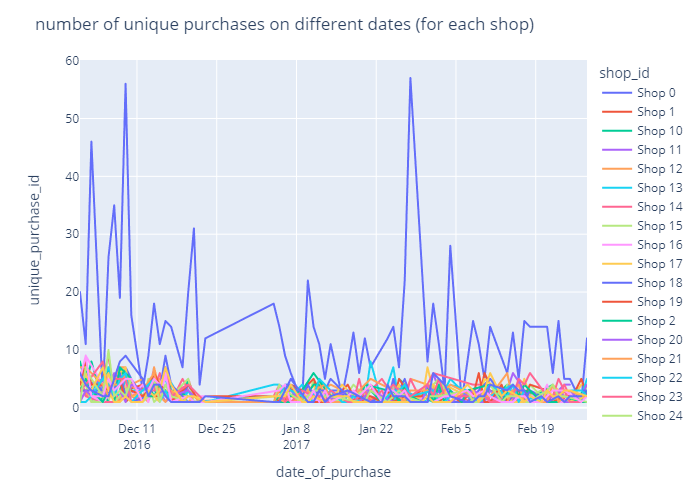

In [37]:
#https://plotly.com/python/line-charts/

fig = px.line(purchase_per_shop_day, x='date_of_purchase', y='unique_purchase_id', color='shop_id')
#fig.update_layout(title_text='number of unique_purchase_id (for each shop)')
fig.update_layout(title_text='number of unique purchases on different dates (for each shop)')
fig.show(renderer="png")

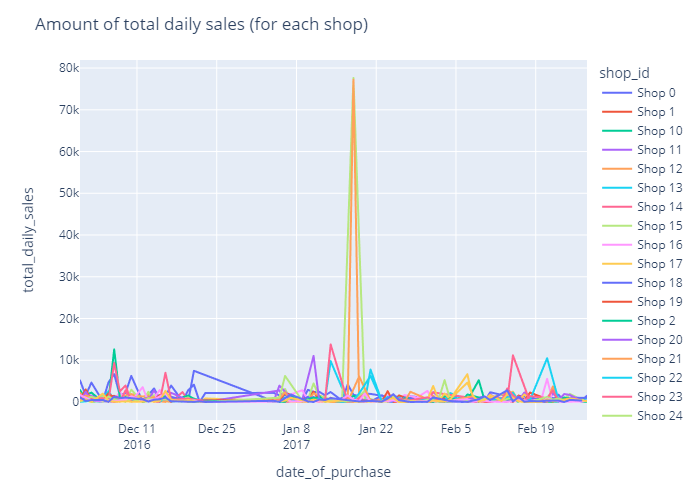

In [38]:
#https://plotly.com/python/line-charts/

fig = px.line(purchase_per_shop_day, x='date_of_purchase', y='total_daily_sales', color='shop_id')
fig.update_layout(title_text='Amount of total daily sales (for each shop)')
fig.show(renderer="png")

**Finding monthly sales and number of purchases in each month w.r.t. each shop**

In [39]:
# Finding purchase per month # for each shop

purchase_per_shop_month = df.groupby(['purchase_year', 'purchase_month', 'shop_id']).agg(
    {'purchase_id': ['count', 'nunique']}
)
purchase_per_shop_month.columns = ['purchase_id_count', 'unique_purchase_id']
purchase_per_shop_month = purchase_per_shop_month.reset_index()

purchase_per_shop_month['avg_items_per_purchaser'] = (purchase_per_shop_month['purchase_id_count'] / purchase_per_shop_month['unique_purchase_id'])
#display(purchase_per_shop_month) 

purchase_per_shop_day['purchase_year'] = purchase_per_shop_day['date_of_purchase'].dt.year
purchase_per_shop_day['purchase_month'] = purchase_per_shop_day['date_of_purchase'].dt.month
#purchase_per_shop_day['purchase_week'] = purchase_per_shop_day['date_of_purchase'].dt.week

# Finding purchase per month # for each shop

sales_per_shop_month = purchase_per_shop_day.groupby(['purchase_year', 'purchase_month', 'shop_id']).agg(
    {'total_daily_sales':'sum'}
)
sales_per_shop_month.columns = ['total_monthly_sales']
sales_per_shop_month = sales_per_shop_month.reset_index()

#sales_per_shop_month['avg_items_per_purchaser'] = (sales_per_shop_month['purchase_id_count'] / sales_per_shop_month['unique_purchase_id'])
#display(sales_per_shop_month) 

In [40]:
purchase_per_shop_month = pd.merge(purchase_per_shop_month, sales_per_shop_month, how="left", on= ['purchase_year','purchase_month','shop_id'])
display(purchase_per_shop_month.head())

,purchase_year,purchase_month,shop_id,purchase_id_count,unique_purchase_id,avg_items_per_purchaser,total_monthly_sales
0,2016,12,Shop 0,16423,375,43.794667,53290.18
1,2016,12,Shop 1,744,49,15.183673,6482.32
2,2016,12,Shop 10,1030,62,16.612903,13472.26
3,2016,12,Shop 11,905,65,13.923077,8599.14
4,2016,12,Shop 12,924,62,14.903226,11427.27


In [41]:
print(sales_per_shop_month.groupby("purchase_month")['total_monthly_sales'].sum())

purchase_month
1     500125.98
2     307552.51
12    384738.65
Name: total_monthly_sales, dtype: float64


In [42]:
# creating a dictionary to add a column to show overall monthly sales
my_dictionary1 = {12: 384738.65, 1 : 500125.98, 2 : 307552.51 }
purchase_per_shop_month['overall_monthly_sales'] = purchase_per_shop_month.purchase_month.replace(my_dictionary1)
#sales_per_shop_month

purchase_per_shop_month['share_shop_m_%']= purchase_per_shop_month['total_monthly_sales'] /purchase_per_shop_month['overall_monthly_sales']*100
#display(purchase_per_shop_month.head())

In [43]:
# Decem_top_shop = purchase_per_shop_month.query(' purchase_month == 12 ').sort_values(by='total_monthly_sales', ascending=False).head()
# display(Decem_top_shop)

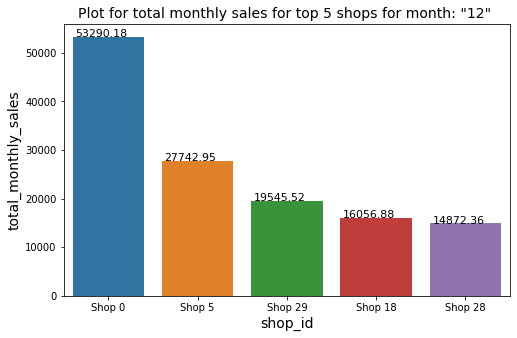

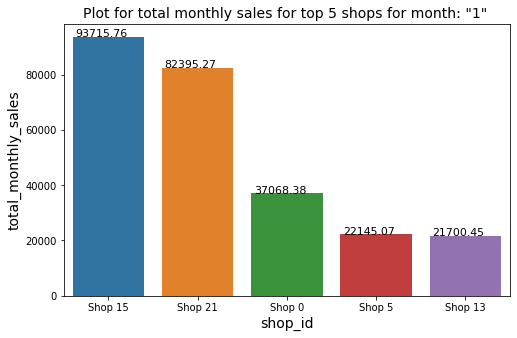

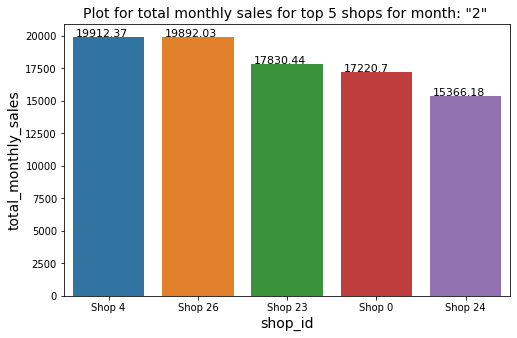

In [44]:
#visualization for total_monthly_sales for top 5 shops for months
months_list = ["12","1","2"]
for j in (months_list):
    fig_dims = (8, 5)
    fig, ax = plt.subplots(figsize=fig_dims)

    plt.title('Plot for total monthly sales for top 5 shops for month: "' + j + '" ', fontsize=14)
    sns.barplot(x='shop_id', y='total_monthly_sales', data= purchase_per_shop_month.query(' purchase_month == @j ').sort_values(by='total_monthly_sales', ascending=False).head())

    plt.xlabel('shop_id', fontsize=14)
    plt.ylabel('total_monthly_sales', fontsize=14);

    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
    plt.show()

In [45]:
# changing the view of above data frame of the number of each events in each date
# Pandas: transform column's values in independent columns
# https://stackoverflow.com/questions/41531689/pandas-transform-columns-values-in-independent-columns?noredirect=1&lq=1

purchase_per_shop_month_A = purchase_per_shop_month.set_index(['shop_id','purchase_month'])['total_monthly_sales'].unstack()
#purchase_per_shop_month_A.columns = [' '.join(col).strip() for col in purchase_per_shop_month_A.columns.values]
purchase_per_shop_month_A = purchase_per_shop_month_A.reset_index()
purchase_per_shop_month_A.columns= ['shop_id','month_1','month_2','month_12']

# Methods for Changing the Column Order of a Pandas Data Frame
# https://towardsdatascience.com/4-methods-for-changing-the-column-order-of-a-pandas-data-frame-a16cf0b58943

purchase_per_shop_month_A = purchase_per_shop_month_A[['shop_id','month_12','month_1','month_2']]

# taking sum for months

#purchase_per_shop_month_A['total_sales'] = purchase_per_shop_month_A.sum(axis=1)
purchase_per_shop_month_A['total_sales'] = purchase_per_shop_month_A['month_12'] + purchase_per_shop_month_A['month_1'] + purchase_per_shop_month_A['month_2']

# Finding overall share percentage for shops
purchase_per_shop_month_A['overall_sales_share_%'] = (purchase_per_shop_month_A['total_sales'] / purchase_per_shop_month_A['total_sales'].sum())*100

display(purchase_per_shop_month_A.head())

,shop_id,month_12,month_1,month_2,total_sales,overall_sales_share_%
0,Shop 0,53290.18,37068.38,17220.70,107579.26,9.021948
1,Shop 1,6482.32,9748.77,9875.00,26106.09,2.189342
2,Shop 10,13472.26,8142.30,11974.04,33588.60,2.816850
3,Shop 11,8599.14,5578.60,10587.66,24765.40,2.076907
4,Shop 12,11427.27,7068.89,3951.27,22447.43,1.882515


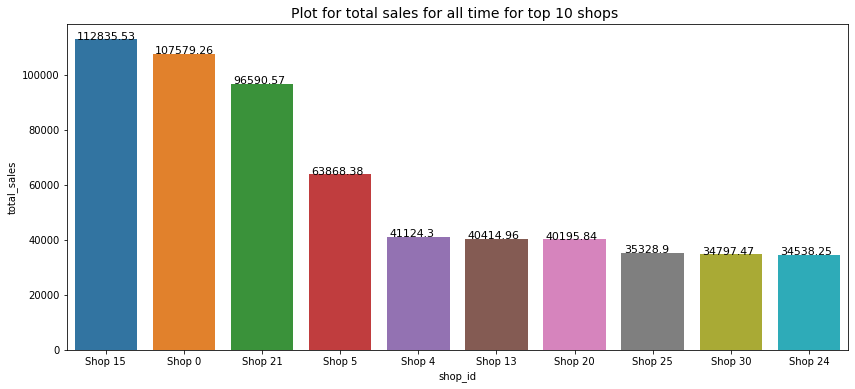

In [46]:
# To visualize Overall sales for all time for top 10 shops 
plt.figure(figsize=(14,6))
plt.title('Plot for total sales for all time for top 10 shops ', fontsize=14)
#d_order
ax=sns.barplot(data=purchase_per_shop_month_A.sort_values(by='total_sales', ascending=False).head(10), x='shop_id', y='total_sales')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


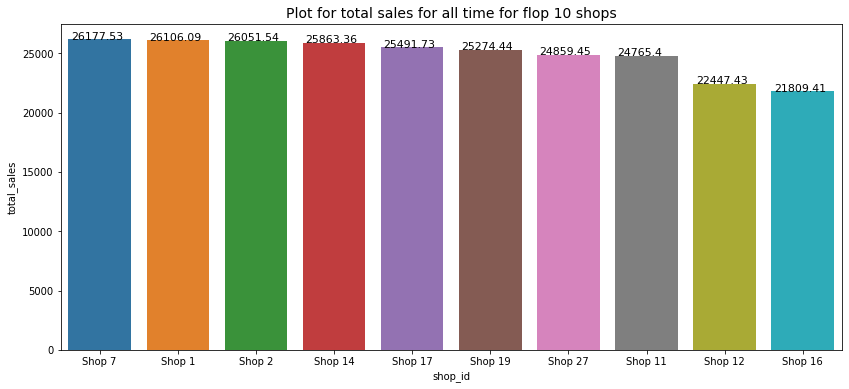

In [47]:
# To visualize Overall sales  for all time for flop 10 shops
plt.figure(figsize=(14,6))
plt.title('Plot for total sales for all time for flop 10 shops', fontsize=14)
#d_order
ax=sns.barplot(data=purchase_per_shop_month_A.sort_values(by='total_sales', ascending=False).tail(10), x='shop_id', y='total_sales')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


**Finding growth rate for each shop**

In [48]:
purchase_per_shop_month_A['growth%_after_2m'] = (purchase_per_shop_month_A['month_2'] - purchase_per_shop_month_A['month_12']) / purchase_per_shop_month_A['month_12'] * 100 
display(purchase_per_shop_month_A.head())

,shop_id,month_12,month_1,month_2,total_sales,overall_sales_share_%,growth%_after_2m
0,Shop 0,53290.18,37068.38,17220.70,107579.26,9.021948,-67.685041
1,Shop 1,6482.32,9748.77,9875.00,26106.09,2.189342,52.337435
2,Shop 10,13472.26,8142.30,11974.04,33588.60,2.816850,-11.120777
3,Shop 11,8599.14,5578.60,10587.66,24765.40,2.076907,23.124638
4,Shop 12,11427.27,7068.89,3951.27,22447.43,1.882515,-65.422450


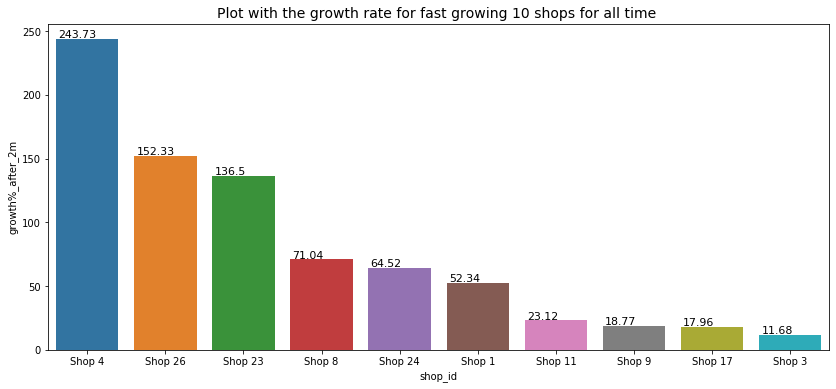

In [49]:
high_growth_shops = purchase_per_shop_month_A.sort_values(by='growth%_after_2m', ascending=False).head(10)
#display(high_growth_shops.head())

# To visualize growth rate for high_growth_shops
plt.figure(figsize=(14,6))
plt.title('Plot with the growth rate for fast growing 10 shops for all time ', fontsize=14)
#d_order
ax=sns.barplot(data=purchase_per_shop_month_A.sort_values(by='growth%_after_2m', ascending=False).head(10), x='shop_id', y='growth%_after_2m')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


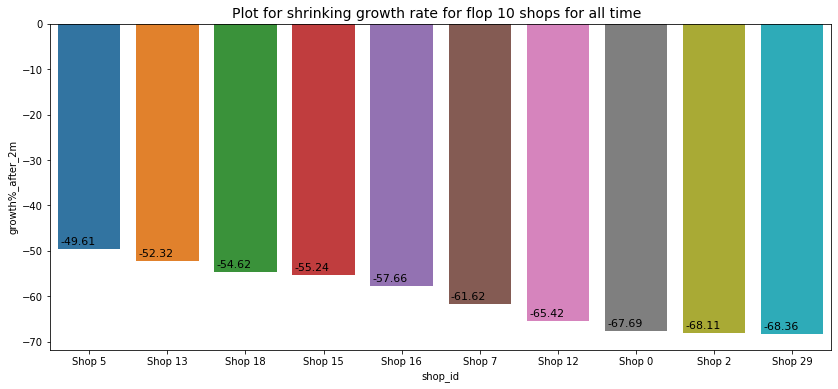

In [50]:
# To visualize Overall sales 
plt.figure(figsize=(14,6))
plt.title('Plot for shrinking growth rate for flop 10 shops for all time  ', fontsize=14)
#d_order
ax=sns.barplot(data=purchase_per_shop_month_A.sort_values(by='growth%_after_2m', ascending=False).tail(10), x='shop_id', y='growth%_after_2m')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


**Looking at the overall_sales_share_% for each shop**

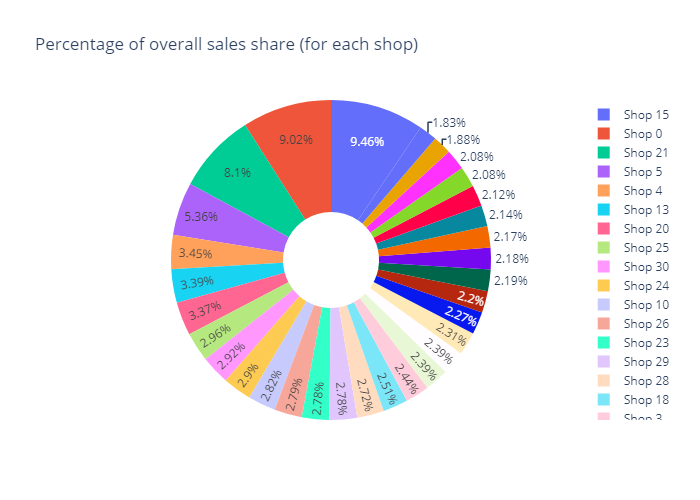

In [51]:
# We can have a look on the overall_sales_share_% for each shop
labels = purchase_per_shop_month_A['shop_id']
values = purchase_per_shop_month_A['overall_sales_share_%']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Percentage of overall sales share (for each shop)')
fig.show(renderer="png")

In [52]:
#https://www.geeksforgeeks.org/get-day-from-date-in-pandas-python/

In [53]:
purchase_per_shop_day['day_of_week'] = purchase_per_shop_day['date_of_purchase'].dt.day_name()
days = {"Monday":1, "Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
purchase_per_shop_day['day_number'] = purchase_per_shop_day['day_of_week'].apply(lambda x: days[x])
display(purchase_per_shop_day.head())

,date_of_purchase,shop_id,purchase_id_count,unique_purchase_id,total_daily_sales,avg_items_per_purchaser,avg_cost_per_purchaser,purchase_year,purchase_month,day_of_week,day_number
0,2016-12-01,Shop 0,1250.0,20.0,5180.25,62.500,259.0125,2016,12,Thursday,4
1,2016-12-01,Shop 1,36.0,4.0,690.35,9.000,172.5875,2016,12,Thursday,4
2,2016-12-01,Shop 10,155.0,8.0,1598.02,19.375,199.7525,2016,12,Thursday,4
3,2016-12-01,Shop 11,90.0,5.0,677.84,18.000,135.5680,2016,12,Thursday,4
4,2016-12-01,Shop 12,25.0,4.0,340.03,6.250,85.0075,2016,12,Thursday,4


In [54]:
sales_on_weekdays = purchase_per_shop_day.groupby(['shop_id','day_number'])['total_daily_sales'].mean().to_frame()
sales_on_weekdays = sales_on_weekdays.reset_index()
display(sales_on_weekdays.sort_values(by=['shop_id', 'total_daily_sales'], ascending= [True, False]).head())

,shop_id,day_number,total_daily_sales
5,Shop 0,6,2317.171818
2,Shop 0,3,2254.807273
1,Shop 0,2,1922.776364
3,Shop 0,4,1542.390000
4,Shop 0,5,1348.604167


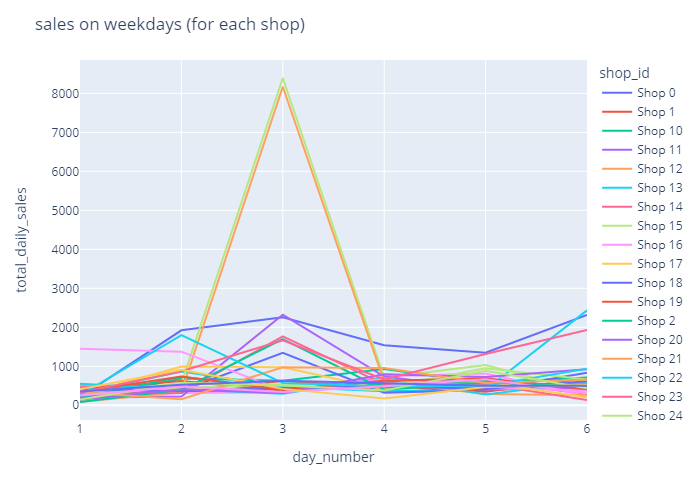

In [55]:
fig = px.line(sales_on_weekdays, x='day_number', y='total_daily_sales', color='shop_id')
fig.update_layout(title_text='sales on weekdays (for each shop)')
fig.show(renderer="png")

**Finding items that are more popular among customers (in terms of selling times and quantity);**

**Finding item that generates the highest (& lowest) revenue;**

In [56]:
# Finding how many times each item were sold
item_times = df['item_id'].value_counts().sort_values(ascending=False).to_frame().reset_index()
item_times.columns = ['item_id' , 'times_sold']
display(item_times.head())

,item_id,times_sold
0,85123A,561
1,22423,497
2,22469,412
3,22720,375
4,85099B,372


In [57]:
# Finding the quantity of sold items 
item_quantity = df.groupby('item_id')['quantity'].sum().sort_values(ascending=False).to_frame().reset_index()
item_quantity.columns = ['item_id' , 'quantity_sold']
display(item_quantity.head())

,item_id,quantity_sold
0,23166,148430
1,84347,11678
2,85123A,11167
3,84077,10126
4,21212,9359


In [58]:
# Finding the revenue that each item brought
item_revenue = df.groupby('item_id')['cost'].sum().sort_values(ascending=False).to_frame().reset_index()
item_revenue.columns = ['item_id' , 'revenue']
display(item_revenue.head())

,item_id,revenue
0,23166,154367.20
1,21623,13206.60
2,21137,9200.46
3,82484,9048.69
4,22469,8128.70


In [59]:
item_quantity_revenue = pd.merge(item_quantity, item_revenue, how='left', on='item_id')
#display(item_quantity_revenue.head())

In [60]:
item_times_quant_rev = pd.merge(item_times, item_quantity_revenue, how='left', on='item_id')
display(item_times_quant_rev.sort_values(by='times_sold' ,ascending=False).head(10))

,item_id,times_sold,quantity_sold,revenue
0,85123A,561,11167,0.00
1,22423,497,3878,0.00
2,22469,412,5606,8128.70
3,22720,375,1711,7271.75
4,85099B,372,7761,0.00
5,22961,337,3964,4955.00
6,22470,319,3262,0.00
7,22457,314,1638,4176.90
8,22960,313,1759,6596.25
9,20725,288,3316,4808.20


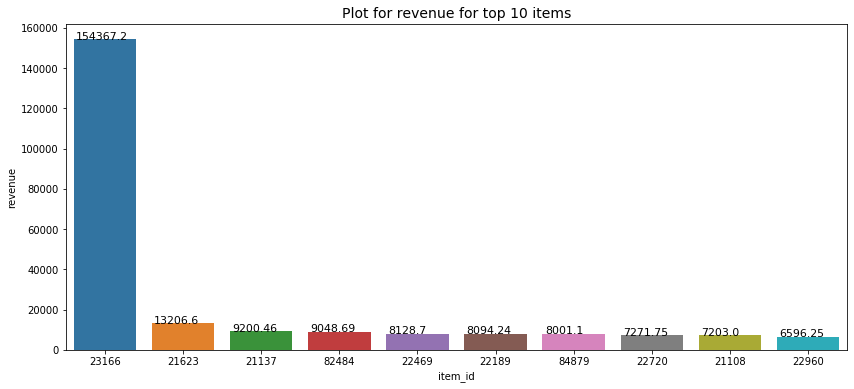

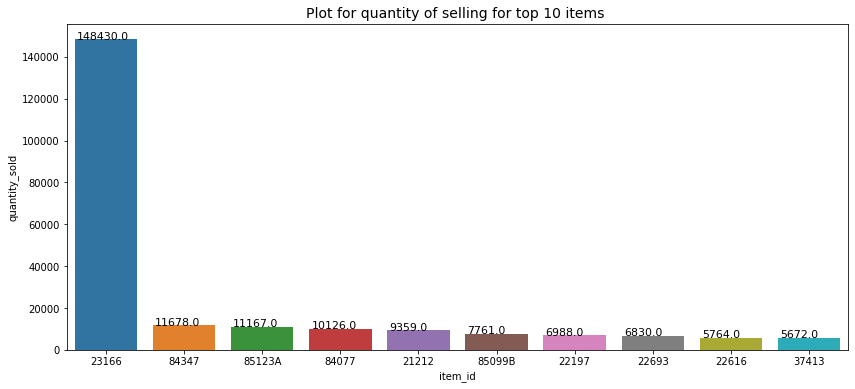

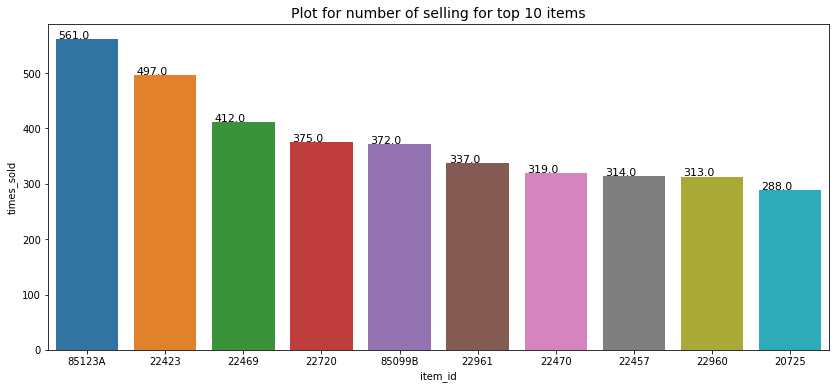

In [61]:
# To visualize revenue for an item (for all shop)
plt.figure(figsize=(14,6))
plt.title('Plot for revenue for top 10 items', fontsize=14)
d_order=['23166','21623','21137','82484','22469','22189','84879','22720','21108','22960']

ax=sns.barplot(data=item_times_quant_rev.sort_values(by='revenue' ,ascending=False).head(10), x='item_id', y='revenue', order=d_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

# To visualize quantity of selling for an item (for all shop)
plt.figure(figsize=(14,6))
plt.title('Plot for quantity of selling for top 10 items ', fontsize=14)

ax=sns.barplot(data=item_times_quant_rev.sort_values(by='quantity_sold' ,ascending=False).head(10), x='item_id', y='quantity_sold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

# To visualize number of selling for an item (for all shop)
plt.figure(figsize=(14,6))
plt.title('Plot for number of selling for top 10 items', fontsize=14)

ax=sns.barplot(data=item_times_quant_rev.sort_values(by='times_sold' ,ascending=False).head(10), x='item_id', y='times_sold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


**Looking at the quantity and revenue generated by items for each shop**

In [62]:
# Finding quantity and revenue  # for each shop

item_quant_rev_shop = df.groupby(['shop_id', 'item_id']).agg(
    {'item_id':'count', 'quantity': 'sum' , 'cost':'sum'}
)
item_quant_rev_shop.columns = ['times_sold', 'sum_of_sold_quant', 'generated_rev']
item_quant_rev_shop  = item_quant_rev_shop.reset_index()

# In this case, we can remove all missing values (considering there is no information available or  0 sales )
item_quant_rev_shop = item_quant_rev_shop.dropna()
#display(item_quant_rev_shop)

#https://www.kite.com/python/answers/how-to-sort-a-pandas-dataframe-by-multiple-columns-in-python
item_quant_rev_shop=item_quant_rev_shop.sort_values(['shop_id', 'generated_rev'], ascending = (True,False)).reset_index()

display(item_quant_rev_shop.head())

,index,shop_id,item_id,times_sold,sum_of_sold_quant,generated_rev
0,982,Shop 0,22086,47.0,779.0,1986.45
1,2230,Shop 0,84029G,57.0,561.0,1901.79
2,1229,Shop 0,22355,72.0,2339.0,1684.08
3,2545,Shop 0,84968C,36.0,164.0,1359.56
4,2206,Shop 0,82494l,26.0,137.0,1135.73


**Looking at how the loyalty program is keeping impact; (Finding the difference of total sales between general customers and registered customers of loyalty program.)**

In [63]:
# Creating a DataFrame with only users who signed up for loyalty_program
loyal_df = df.query('loyalty_program == 1 ')
display(loyal_df.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date_of_purchase,price_per_one,cost,purchase_year,purchase_month,purchase_week
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,1.65,0.00,2016,12,50
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,0.72,5.04,2016,12,50
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2.55,0.00,2017,2,6
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,0.00,0.00,2017,2,7
5,538379,22965,0,2016-12-12 11:26:00,22805,1,Shop 20,2016-12-12,1.85,0.00,2016,12,50


In [64]:
# Creating a DataFrame with only users who did not sign up for loyalty_program
general_df = df.query('loyalty_program == 0 ')
display(general_df.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date_of_purchase,price_per_one,cost,purchase_year,purchase_month,purchase_week
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,0.42,4.62,2016,12,49
6,540468,22189,0,2017-01-07 13:55:00,unknown,0,Shop 0,2017-01-07,2.31,0.00,2017,1,1
7,541424,79321,1,2017-01-17 17:57:00,unknown,0,Shop 0,2017-01-17,0.00,0.00,2017,1,3
8,538883,22891,0,2016-12-14 15:56:00,unknown,0,Shop 0,2016-12-14,3.75,0.00,2016,12,50
11,541696,22197,4,2017-01-20 18:08:00,unknown,0,Shop 0,2017-01-20,0.72,2.88,2017,1,3


In [65]:
# Finding if there is any customer of loyalty program without customer id
display(loyal_df.query(' customer_id == "unknown" '))

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date_of_purchase,price_per_one,cost,purchase_year,purchase_month,purchase_week


In [66]:
# Creating a DataFrame with only users who did not sign up for loyalty_program but have customer id
general_df_with_customer_id = general_df.query(' customer_id != "unknown" ')
display(general_df_with_customer_id.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date_of_purchase,price_per_one,cost,purchase_year,purchase_month,purchase_week
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,0.42,4.62,2016,12,49
12,543647,21987,3,2017-02-10 19:49:00,18520,0,Shop 17,2017-02-10,0.53,1.59,2017,2,6
13,538533,22294,9,2016-12-13 10:31:00,20475,0,Shop 24,2016-12-13,1.06,9.54,2016,12,50
14,545180,22352,5,2017-02-28 14:42:00,18407,0,Shop 18,2017-02-28,2.10,10.50,2017,2,9
17,541838,84949,11,2017-01-23 10:43:00,18595,0,Shop 14,2017-01-23,1.45,15.95,2017,1,4


In [67]:
# Creating a DataFrame with only users who did not sign up for loyalty_program and do not have customer id
general_df_without_customer_id = general_df.query(' customer_id == "unknown" ')
display(general_df_without_customer_id.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date_of_purchase,price_per_one,cost,purchase_year,purchase_month,purchase_week
6,540468,22189,0,2017-01-07 13:55:00,unknown,0,Shop 0,2017-01-07,2.31,0.00,2017,1,1
7,541424,79321,1,2017-01-17 17:57:00,unknown,0,Shop 0,2017-01-17,0.00,0.00,2017,1,3
8,538883,22891,0,2016-12-14 15:56:00,unknown,0,Shop 0,2016-12-14,3.75,0.00,2016,12,50
11,541696,22197,4,2017-01-20 18:08:00,unknown,0,Shop 0,2017-01-20,0.72,2.88,2017,1,3
16,539744,22300,5,2016-12-21 15:21:00,unknown,0,Shop 0,2016-12-21,0.00,0.00,2016,12,51


In [68]:
print("Total revenue from customers of loyalty program: ", loyal_df['cost'].sum())
print()
print("The number of unique purchase of loyalty program: ", loyal_df['purchase_id'].nunique())
print("Average revenue per purchase of loyalty program: ", round(loyal_df['cost'].sum() / loyal_df['purchase_id'].nunique(),2))
print()
print()
#print("Total revenue from customers of loyalty program: ", loyal_df['cost'].sum())
print("The number of unique customers of loyalty program: ", loyal_df['customer_id'].nunique())
print("Average revenue per customers of loyalty program: ", round(loyal_df['cost'].sum() / loyal_df['customer_id'].nunique(),2))
print()

Total revenue from customers of loyalty program:  276519.11

The number of unique purchase of loyalty program:  1344
Average revenue per purchase of loyalty program:  205.74


The number of unique customers of loyalty program:  587
Average revenue per customers of loyalty program:  471.07



In [69]:
print("Total revenue from customers who are not in loyalty program: ", general_df['cost'].sum())
print("The number of unique purchase for the customers who are not in loyalty program: ", general_df['purchase_id'].nunique())
print("Average revenue per purchase for the customers who are not in loyalty program: ", round(general_df['cost'].sum() / general_df['purchase_id'].nunique(),2))
print()
print()

print("Total revenue from customers having id but who are not in loyalty program: ", general_df_with_customer_id['cost'].sum())
print()
print("The number of unique purchase having id but not in loyalty program: ", general_df_with_customer_id['purchase_id'].nunique())
print("Average revenue per purchasers having id but not in loyalty program : ", round(general_df_with_customer_id['cost'].sum() / general_df_with_customer_id['purchase_id'].nunique(),2))
print()

#print("Total revenue from customers having id but who are not in loyalty program: ", general_df_with_customer_id['cost'].sum())
print("The number of unique customers having id but not in loyalty program: ", general_df_with_customer_id['customer_id'].nunique())
print("Average revenue per customers who are not in loyalty program but have an id: ", round(general_df_with_customer_id['cost'].sum() / general_df_with_customer_id['customer_id'].nunique(),2))
print()

Total revenue from customers who are not in loyalty program:  915898.03
The number of unique purchase for the customers who are not in loyalty program:  3550
Average revenue per purchase for the customers who are not in loyalty program:  258.0


Total revenue from customers having id but who are not in loyalty program:  832765.01

The number of unique purchase having id but not in loyalty program:  2802
Average revenue per purchasers having id but not in loyalty program :  297.2

The number of unique customers having id but not in loyalty program:  1162
Average revenue per customers who are not in loyalty program but have an id:  716.67



In [70]:
print("Total revenue from customers who are not in loyalty program and do not have an id : ", general_df_without_customer_id['cost'].sum())
print()
print("The number of unique purchase of customers who are not in loyalty program and do not have an id: ", general_df_without_customer_id['purchase_id'].nunique())
print("Average revenue per purchase of customers who are not in loyalty program and do not have an id: ", round(general_df_without_customer_id['cost'].sum()/ general_df_without_customer_id['purchase_id'].nunique(),2))
print()

Total revenue from customers who are not in loyalty program and do not have an id :  83133.02

The number of unique purchase of customers who are not in loyalty program and do not have an id:  748
Average revenue per purchase of customers who are not in loyalty program and do not have an id:  111.14



<a id='the_destination4'></a>
### Test the hypotheses

**Formulation of hypothsis:**


- Null Hypothesis (H_0) : The average cost per purchaser of Saturday in different shops does not differ to the average cost per purchaser of other days.


- Alternative hypothesis (H_1) : The average cost per purchaser of Saturday is different than that of other days.


**Critical statistical significance level**

At this point, we need to determine our critical statistical significance level.
The significance level, denoted as alpha, is the probability of rejecting the null hypothesis when p-value is less than alpha. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. 

- However in our case, critical statistical significance level, alpha = 0.05 

In [71]:
variance_r = np.var(purchase_per_shop_day['avg_cost_per_purchaser'])
#print("variance for avg_cost_per_purchaser column:", variance_r) 
standard_deviation_r = np.std(purchase_per_shop_day['avg_cost_per_purchaser'])
#print ("standard deviation for avg_cost_per_purchaser column:", standard_deviation_r) 

variance_r_1 = np.var(purchase_per_shop_day.query('day_of_week == "Saturday" ')['avg_cost_per_purchaser'])
#print("variance for avg_cost_per_purchaser column where day_of_week == "Saturday":", variance_r_1) 
variance_r_2 = np.var(purchase_per_shop_day.query('day_of_week != "Saturday" ')['avg_cost_per_purchaser'])
#print("variance for avg_cost_per_purchaser column where day_of_week != "Saturday":", variance_r_2) 

if variance_r_1 == variance_r_2:
    print('both variance are equal')
elif variance_r_1 != variance_r_2:
    print('variance in both cases are not equal. So, pass the parameter : equal_var = False ')
else:
    print("can not be compared")

variance in both cases are not equal. So, pass the parameter : equal_var = False 


In [72]:

alpha = 0.05 # critical statistical significance level
results = stats.ttest_ind(purchase_per_shop_day.query('day_of_week == "Saturday" ')['avg_cost_per_purchaser'], purchase_per_shop_day.query('day_of_week != "Saturday" ')['avg_cost_per_purchaser'] , equal_var = False ) # test the hypothesis that the means of the two independent populations are equal
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.7674416582654753
We can't reject the null hypothesis


Hence the null hypothesis: "The average cost per purchaser of Saturday in different shops does not differ to the average cost per purchaser of other days" can not be rejected.

**Formulation of hypothsis for loyalty program groups: 1 and 0:**


- Null Hypothesis (H_0) : There is no statistically significant difference for purchasers of two groups of loyalty program (i.e. 1 and 0).


- Alternative hypothesis (H_1) : There is a statistically significant difference for purchasers of two groups of loyalty program (i.e. 1 and 0).

In [73]:
shop_program_purchaser= df.pivot_table(index='shop_id', values='purchase_id', columns='loyalty_program', aggfunc=lambda x: x.nunique())
#shop_program_purchaser.columns = [' '.join(col).strip() for col in shop_program_purchaser.columns.values]
shop_program_purchaser.columns =[0,1]
shop_program_purchaser =shop_program_purchaser.reset_index()
display(shop_program_purchaser.head())

,shop_id,0,1
0,Shop 0,836,42
1,Shop 1,102,40
2,Shop 10,89,44
3,Shop 11,99,48
4,Shop 12,83,42


**Function for hypothesis testing**

In [74]:
# function for hypothesis testing.

# find statistical significance for each group for each shop

def statistical_significance_test_func(group1, group2, alpha):


    for shop in shop_program_purchaser.shop_id.unique():

        #alpha = .05 # significance level
        #bonferroni_alpha = alpha / 15  # 2*31 = 62 comparisons made
        
        successes1 = shop_program_purchaser[shop_program_purchaser.shop_id == shop][group1].iloc[0]
        successes2 = shop_program_purchaser[shop_program_purchaser.shop_id == shop][group2].iloc[0]

        
        trials1 = df[df.loyalty_program == group1]['purchase_id'].nunique()
        trials2 = df[df.loyalty_program == group2]['purchase_id'].nunique()

        # success proportion in the first group:
        p1 = successes1 / trials1

        # success proportion in the second group:
        p2 = successes2 / trials2

        # success proportion in the combined dataset:
        p_combined = (successes1 + successes2) / (trials1 + trials2)

        # the difference between the datasets' proportions
        difference = p1 - p2
        
        # calculating the statistic in standard deviations of the standard normal distribution
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

        # setting up the standard normal distribution (mean 0, standard deviation 1)
        distr = stats.norm(0,1)

        # calculate p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('p_value: ', p_value)
        
        if (p_value < alpha):
            print("We reject the null hypothesis. There is a significant difference between the proportions of",shop, "of both groups:",group1, "and", group2 ,".")
            print()
        else:
            print("We can't reject the null hypothesis. There is no reason to consider the proportions are different of", shop,"of both groups:",group1, "and", group2 , ".")
            print()


In [75]:
statistical_significance_test_func(0,1, 0.05)

p_value:  0.0
We reject the null hypothesis. There is a significant difference between the proportions of Shop 0 of both groups: 0 and 1 .

p_value:  0.8481251190330878
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 1 of both groups: 0 and 1 .

p_value:  0.14090498778526017
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 10 of both groups: 0 and 1 .

p_value:  0.1522120487402625
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 11 of both groups: 0 and 1 .

p_value:  0.11934479498391903
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 12 of both groups: 0 and 1 .

p_value:  0.0014752946300957692
We reject the null hypothesis. There is a significant difference between the proportions of Shop 13 of both groups: 0 and 1 .

p_value:  0.3074120815454675
We can't re

**Number of statistical hypothesis tests that were carried out, required significance level , Bonferroni procedure (correction):**

In [76]:
# required significance level, alpha = 0.05;  Number of comparison = 2*31 = 62 
bonferroni_alpha = 0.05 / 62  
print('bonferroni_alpha:', bonferroni_alpha)

bonferroni_alpha: 0.0008064516129032258


In [77]:
print(statistical_significance_test_func(0, 1, 0.0008)) # bonferroni_alpha has been applied

p_value:  0.0
We reject the null hypothesis. There is a significant difference between the proportions of Shop 0 of both groups: 0 and 1 .

p_value:  0.8481251190330878
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 1 of both groups: 0 and 1 .

p_value:  0.14090498778526017
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 10 of both groups: 0 and 1 .

p_value:  0.1522120487402625
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 11 of both groups: 0 and 1 .

p_value:  0.11934479498391903
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 12 of both groups: 0 and 1 .

p_value:  0.0014752946300957692
We can't reject the null hypothesis. There is no reason to consider the proportions are different of Shop 13 of both groups: 0 and 1 .

p_value:  0.3074120815454675
We

**Path to the presentation's file:**

Please, visit :   https://drive.google.com/file/d/11iMie-T1oyUkbvYAFpMbJNw8bKqeysDx/view?usp=sharing 

<div class="alert alert-info"> 
<b>Remark:</b> 
I would like to state that due to special reasons, neither all the comments nor the report of the analysis were added with this part of the project. Therefore, there is no reason to consider this version as complete though this is the important and core part of the project.  
    
                                      Thank you very much for your scrutiny and time.
   
</div>